<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 1*

---





# N411. 퍼셉트론(Perceptron)과 인공신경망(Artificial Neural Networks)

이번 스프린트부터는 신경망(딥러닝)에 대해서 공부해보겠습니다. <br> 앞으로 공부할 목차는 다음과 같습니다. 
앞으로 2주간 공부할 내용은 매우 중요하고, 이 내용만 잘해도 과감하게 10%의 일자리는 공략할 수 있다고 생각됩니다. 그렇기에 목차/예습/복습을 철저히 해주시길 부탁드립니다.

## 🏆 목차
  * 신경망과 퍼셉트론의 개념 학습 - **구조, 입출력, 학습**
  * 역전파(Backpropagation, backward pass) - **학습방법에 대한 구체적인 지식**
  * 신경망 프레임워크와 학습규제(regularization) 전략 - **Weight Decay, Constraint, Learning Rate**
  * 신경망의 파라미터 튜닝, 실험추적 시스템 - **Keras tuner, wandb**
---
  * 텍스트 전처리 - **필요성, 토큰화, 시각화, 불용어제거**
  * 텍스트 벡터화 - **언어모델의 이해, CountVectorize, TF-IDF, LSA**
  * Word2Vec, 시퀀스 데이터를 위한 딥러닝 - **Word2Vec이해, RNN, LSTM, GRU**
  * Attention과 Transformer - **개념소개, Self-attention, 구동원리**
---
  * CNN (Convolutional Neural Network) - **이미지 데이터 처리방법, pre-trained model 사용방법**
  * Segmenatation - **FCN, Unet, 상용모델 사용하기** 
  * AutoEncoder - **데이터 압축, Latent개념, 분류기로의 활용**
  * GAN(Generative Adversarial Network) - **DCGAN, CycleGAN, 상용 GAN 구현하기**


## Warm Up

- [일반인을 위한 딥러닝 영상 feat.역사 (0-15분까지만 시청)](https://www.youtube.com/watch?v=C2sqt9pG6K0)
  - 신경망의 역사에 대해서 배우고, 신경망의 원리를 '일반인'에게 설명할 수 있다는 학습목표를 가지고 공부하시면 이번 챕터를 수월하게 넘어가실 수 있습니다. 
- [신경망으로 Linear Regression (03:25~08:50까지)](https://youtu.be/PyzBX93icz0?t=204)
  - Section2에서 배웠던 Linear Regression에 대해서 배운 내용을 재확인하고, 신경망을 이용하여 Linear Regression를 표현한다면 어떻게 만들어 볼 수 있는 지, 수학적인 접근을 배워볼 수 있습니다. 
- 복습 : [머신러닝 개발자들의 일반적인 실수, 과적합 (Overfitting, 4분)](https://www.youtube.com/watch?v=f4sP7OE68-A)
- 복습 : [교차검증(Cross Validation, 3분)](https://www.youtube.com/watch?v=TIgfjmp-4BA)
- 복습 : [데이터 split & shuffle for ML (7분)](https://www.youtube.com/watch?v=JxFA_bZWPvU)
- 학습방법 : Section4를 공부하면서 메타인지가 중요합니다. 내가 아는 것과 모르는 것을 정확하게 구분하는 연습을 해보고, 정확한 개념이 맞는지 이해하고, 정리하고, 설명해보면 좋겠습니다.  [읽어볼 거리 1](https://m.blog.naver.com/PostView.nhn?blogId=hems97&logNo=220557131351&proxyReferer=https:%2F%2Fwww.google.com%2F) (웹페이지) / [읽어볼 거리 2](https://brunch.co.kr/@kamohaeng/53) (웹페이지)
  - 내가 무엇을 알고 무엇을 모르고 있는 지 확인하고, 필요한 것을 빠르게 획득하고자 노력해봅시다.
  - 강의에서 상대적으로 덜 중요한것들은 간단히 외우고 넘어가는 것도 중요합니다. 제한된 시간에 집중해야 할 것을 알려드리려고 노력해보겠습니다.

## ❓ 시작하기 전에 - 딥러닝의 역사
### 딥러닝이라고 쓰고 인공지능이라고 읽은 뒤, 다시보는 역사

인공지능(AI)를 첫 가지로 잡으면 큰 맥락에서 중요하고 생각된 분야와 내용이 다뤄졌습니다. 

<img src="https://originalstatic.aminer.cn/misc/shaozhou/AI-history-tiny.jpg" />

- 패턴인식(Pattern Recognition)
 - 신경망(Neural Networks)
    * 머신러닝
      * 딥러닝(신경망)
      * ....
 - 이미지인식(Image Recogition)
    * 컴퓨터비전(Computer Vision)
      * 딥러닝(신경망)
      * ....
 - 자연어처리(Natural Language Processing)
    * 자연어인식 (Natural Language Understanding) → 딥러닝 기반의 자연어 인식
- 휴리스틱 프로그램 (Heuristic Programs)
 - 게임 기술 (Game Playing)
   * 강화학습(Reinforcement Learning) → 딥러닝 기반 강화학습 (Deep Reinforcement Learning)
- 로보틱스(Robotics)

첫 Section에서 다뤘던 것처럼 각 분야의 전문가들이 있습니다.
모든 것을 다 잘해야하진 않습니다. 

이번 섹션을 여러 실습을 통해서 수료하시면, 100개의 회사 중에서 적어도 10개의 회사에서 할 수 있는 업무들을 배우실 수 있을 것입니다. <br><br>

---

<br>

## 🏆 오늘의 학습목표

* 퍼셉트론(Perceptron)을 이해하고 python으로 구현할 수 있다.
* 신경망(Neural network)의 원리를 이해하고 기본적인 구조를 예를 들어 신경망을 설명할 수 있다.
* 신경망이 학습된다는 개념을 이해한다

**신경망의 중요성!** <br>
  1950년대 고양이 신경세포의 실험을 통해 얻어진 신경망 아이디어는 오늘날 다층신경망(MLP, multilayer perceptron)의 발전으로 매우 강력한 머신러닝 기술 중 한 가지가 되었습니다. 이제는 머신러닝에서 독립하여 딥러닝이라는 학문으로 발전하여 단순 계산만 잘 하던 컴퓨터를 사물인식, 분할기술, 자연어 처리 등은 컴퓨터가 잘 못하는 영역까지 사람보다 뛰어난 성과를 보이며 발전하고 있습니다. 

**왜 신경망이 다시 대두되었는가?** <br>

- 딥러닝의 발전은 핵심 알고리즘의 발전
- Framework의 발전(Tensorflow, PyTorch 등)
- CUDA (Gpu library, 속도증가)
- ImageNet과 같은 벤치마크 Dataset 등의 발전

여러가지 상황들이 결합되면서, 딥러닝의 중흥기가 되었습니다. 한국에서도 2016년 알파고를 기점으로 사람들을 놀라게 하며 인공지능이 필요한 여러 분야, 심지어 필요없는 분야에까지 진출하여 급속한 투자와 함께 깊게 활용되고 있습니다. 물론 사람들의 과도한 기대와 마케팅적 활용으로 인해 그 진실이 가려지는 모습도 볼 수 있었습니다.

<img src='https://i.kym-cdn.com/photos/images/original/001/449/433/3cb.jpg' width = '400'> [사진출처](https://knowyourmeme.com/memes/cutting-food-with-a-sword)


**그러면 우리는 무엇을 배우고 익힐 것인가?** <br>
- 여러분들은 이번 Sprint를 통해 신경망이라는 기법의 장점과 약점을 익히고, 적재적소에 활용할 수 있는 **나의**도구로 만들어야 합니다. 

- 그러려면 일단 신경망의 거부감이 사라져야 합니다. 누가 **신경망/인공지능** 얘기만 하면 나도 얘기하고 싶어질 수 있도록 일상에서도 관심을 가져야 합니다. 

- 개념을 말해보는 것이 굉장히 중요합니다. 그래서 QnA시간에 **3명정도 호명**해서 오늘 배운 내용을 말해보게 할 거에요! 내가 배운 내용을 말해보면서 정리가 된다면, 메타인지로 넘어갈 수 있습니다. 

- 새롭게 배운 개념이 있다면, 글로 적으면서 정리할 수도 있고, 내가 말해보면서 제대로 설명할 수 있는 지를 확인해보시기 바랍니다. 앞으로도 좋은 공부방법이 될 것입니다. 

- 딥러닝의 단점도 알고 깔 수도 있어야 합니다. 데이터가 많을 때에만 좋은 도구라는 사실이고, 가장 조악한 방법론인데, 여러 기법들과 빅데이터를 만나 지금은 실로 엄청난 역할을 수행한다고 츤데레처럼 말할 수 있어야 합니다. 

- 한편, 위 Meme에서처럼 딥러닝은 단순한 문제를 풀 때는 쓸모가 없을 수도 있어요. 게임에서나 볼법한 검(Sword)을 스테이크를 자를 때 사용할 필요없지만 "최종 Boss를 만났을 때 (사물인식, 음성인식 등)" 유용해질 수 있는 것다는 것입니다. 그렇기 때문에 문제를 잘 인식하는 것부터 잘 해보시기 바랍니다.  

신경망은 긴 역사를 가지고 있을 뿐 아니라 현재도 머신러닝에서 가장 많은 연구 결과가 쏟아져 나오는 분야입니다. 이번 sprint에서 신경망에 대해 모든 것을 다룰 수 없겠지만, 신경망(Neural Network)에 대해서 누구와도 대화할 수 있는 가장 기본적인 이론, 용어, 필수 라이브러리 등을 공부하게 됩니다.
이것들은 여러분에게 최신 딥러닝의 개발과 발전을 탐구할 수 있는 좋은 기초를 제공할 것입니다.

<br><br><br><br><br>

## 퍼셉트론(Perceptron)이란?

사람의 뇌는 치밀하게 연결된 100억개의 뉴런으로 구성되어 있습니다. 뉴런들 사이에는 시냅스라는 연결이 뉴런마다 1000개에서 10000개까지 연결이 되어서 인터넷처럼 망으로 구성되어 "생각"이라는 것을 할 수 있게 되었습니다. 그렇다면 우리도 이런 퍼셉트론의 개념을 따라하면 인공적으로 '생각'하는 것 같은 무엇인가를 만들 수 있지 않을까요?

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note_image/%E1%84%91%E1%85%A5%E1%84%89%E1%85%A6%E1%86%B8%E1%84%90%E1%85%B3%E1%84%85%E1%85%A9%E1%86%AB.jpg"/>


> 신경망을 이루는 가장 기본 단위로 퍼셉트론(Perceptron)

- 퍼셉트론은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년 고안한 알고리즘
- 1950년대? 고대 화석 같은 이 알고리즘을 지금 시점에 왜 배우는가?
- 퍼셉트론이 신경망(딥러닝)의 기원이 되는 알고리즘이기 때문

> 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 **신호**를 출력

- 여기서 **신호**란 전류나 강물처럼 흐름이 있는 것을 상상하면 됩니다. 
- 전류가 전선을 타고 전자가 이동하듯이 퍼셉트론은 데이터와 가중치들이 연산의 흐름을 만들어 정보를 계속해서 옆으로 전달하게 됩니다. 
- 다만, 실제 전류/수로와는 달리 '흐른다' 또는 '안 흐른다'로 0이나 1의 값을 가질 수 있습니다. 
- 가중치는 전류에서 말하는 저항에 해당합니다. 저항은 전류의 흐름을 억제하는 파라미터로 저항이 낮을수록 큰 전류가 흐르죠. 
- 한편 퍼셉트론에서는 그 값이 클수록 강한 신호를 흘려보냅니다. 작용하는 방향은 반대지만, 언젠가 배웠던 저항의 개념으로 얼마나 잘 흐르는가를 통제한다는 점에서 저항과 가중치는 같은 기능을 합니다. 

### 단순한 논리게이트로 본 퍼셉트론

#### AND GATE

> 입력신호가 모두 1일 때 1을 출력

디지털 논리회로를 이용한 퍼셉트론의 문제를 살펴보겠습니다. 

- 예) 밤에 라면을 먹고싶은데 먹어야 할까 말아야 할까를 고민하고 있습니다. 

실제는 그렇지 않겠지만, 딱 2가지만을 고려할 것입니다. 
- (1) 저녁을 안 먹었는가?
- (2) 11시 이전인가? 
두 조건이 만족되었을 때 라면을 먹는다고 생각하는 최소한의 퍼셉으론을 구현한다고 할 때 이 게이트를 사용할 수 있습니다. 

(게이트의 기호나 용어는 처음 학계의 약속이라서 그대로 받아들이시면 좋습니다)



<img src="https://www.allaboutcircuits.com/uploads/articles/two-input-and-gate-truth-table.jpg" />

이는 논리회로의 진리표라고도 하는데요, 두 입력이 모두 1일 때에만 1을 출력하고, 그 외에는 0을 출력하는 구조입니다. 

In [ ]:
# 위 예시를 python으로 제작을 해보겠습니다. 
# w1, w2는 가중치(weight)를 의미하는 변수입니다.
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1

In [ ]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


**NAND GATE**


> NAND gate는 AND gate의 결과의 반대, Not AND

이번에는 NAND 게이트를 살펴봅시다. NAND는 not AND 게이트를 의미합니다. 바로 위의 AND게이트의 결과를 뒤집으면 됩니다. 0은 1로, 1은 0으로 출력하도록 만드는 것이죠. 

<img src="https://www.allaboutcircuits.com/uploads/articles/2-input-nand-gate.jpg" />

In [ ]:
def  NAND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 1 ## only change here
  elif tmp > theta:
    return 0 ## only change here

In [ ]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


**OR GATE**

> 입력신호가 하나만 1이어도 1을 출력


<img src="https://www.allaboutcircuits.com/uploads/articles/two-input-or-gate-truth-table.jpg" />

In [ ]:
def OR(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.3 ## only change here
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0 
  elif tmp > theta:
    return 1 

In [ ]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))


0
1
1
1


### XOR GATE 만들기

> 입력신호가 다를 때 1을 출력

퍼셉트론의 한계를 지적하며 나온 문제가 바로 XOR문제입니다. 
정확한 명칭으로는 exclusive or 를 의미합니다. 

> 노트 과제

- XOR GATE를 만들어보세요. 
- 이 게이트는 두 입력 값 x1, x2가 다를 때만 1을 출력합니다. 
- 함수로 사용하면 아래와 같이 출력값이 나와야 합니다.

 * XOR(1, 1) = 0

 * XOR(1, 0) = 1

 * XOR(0, 1) = 1

 * XOR(0, 0) = 0

 (Hint: 위에서 만든 함수(AND, NAND, OR)를 묶어서 사용하면 이 문제를 해결할 수 있습니다.)

## 신경망의 기본 구조

신경망(Neural Networks)은 새로운 기술이 아닙니다. 1943년경 뇌의 신경활동을 수학으로 표현한 아이디어와 위에서 배운 1957년 Rosenblatt이 고안한 Perceptron(퍼셉트론) 알고리즘이 발전해 지금까지 이르게 되었습니다. 실제로 1970년대에 신경망에 대한 연구가 많이 진행되었던 것을 알 수 있습니다. 많은 한계점들이 있던 신경망 기술이 좋은 시대를 만나 꽃을 피우게 된 것입니다.

정확한 용어로 Artificial Neural Networks(ANN, 인공신경망)이라고 불리는 학습 모델이며 뇌의 실제 신경계의 특징을 모사하여 만들어진 계산 모델(computational model)입니다. 뇌 신경망의 작은 구조인 뉴런(Neuron)을 모사한 인공 뉴런인 퍼셉트론은 다수의 입력 신호를 받아 하나의 신호를 출력합니다. 최근에는 **'뉴럴넷'**이라는 이름으로 가장 많이 사용됩니다.

그러면 실제 신경세포를 간단히 알아보면서 신경망의 세계로 들어가보겠습니다. 


* 신경세포(Neuron)

 * 뉴런, 수상돌기(Dendrites)에서 입력신호(다른 뉴런과의 시냅스)를 받아들임
 * 신경세포 내에서 정보를 통합함
 * 임계값을 넘어서는 전류가 생기면 Axon Hillock이 축삭돌기(Axon)로 최종 출력 신호(또 다른 뉴런으로 전파)를 전송 <img src="https://upload.wikimedia.org/wikipedia/commons/c/cf/Axon_Hillock.png">



<br><br>

* 퍼셉트론

 - 아래 그림에서 '원'으로 표현된 것을 뉴런 or 노드(node)라고 함. 
 - 입력신호(x0, x1, ...)가 뉴런에 입력되면 각각 고유한 가중치(화살표=weights, w0, w1, ...)가 곱해지고 다음 노드에서는 입력된 모든 신호를 더해줌. 
 - 이는 시냅스(synapses)의 연결강도(시냅스의 두께, 개수)와 같은 역할을 함
 - 각 뉴런에서의 연산값이 정해진 임계값(TLU; Threshold Logic Unit)을 넘을 경우에만 다음 노드들이 있는 층(layer)으로 신호를 전달 <br>
 <img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note_image/perceptron_TLU.png"/>

여기서 기억해야 할 것은 인공신경망이 우리 신경계를 얼마나 잘 모사하느냐는 우리의 관심사가 아니라는 것 입니다. 인공신경망의 목표는 데이터에서 발견할 수 있는 복잡한 관계를 학습할 수 있는 강력한 알고리즘과 데이터 구조를 만드는 것 입니다. 


### 활성함수 (Activation function)
신경망의 기본은 퍼셉트론을 통해서 다뤄보았는데요, 진짜 신경망으로 가기 위해서는 활성함수(Activation function)을 배워야 합니다. 위에서는 TLU로 간단히 다뤄봤던 유닛에 대해서 배워볼 것입니다. 가장 기본적인 함수 3개에 대해서 알아봅시다.

#### 계단함수(Step function) 구현하기

In [5]:
# 0보다 큰 경우에 1을 출력하고, 0보다 작을 때 0을 출력하는 계단 함수 구현하기

# 라이브러리 
import numpy as np
import matplotlib.pyplot as plt 
import math 

# 샘플 데이터를 확인합니다. 
x = np.array([-1, 1, 2])
print("input : ", x)

# 0보다 큰가?
y = x>0
print("Logic : ", y)

# 논리형태를 0과 1로 표현해보기
y = y.astype(np.int)
print("Boolean : ", y)

input :  [-1  1  2]
Logic :  [False  True  True]
Boolean :  [0 1 1]


In [ ]:
# 함수 정의
def step_function(x):
  return np.array(x>0, dtype=np.int)

In [ ]:
# 함수 실행
print(step_function(-1))
print(step_function(0.5))
print(step_function(500000))

0
1
1


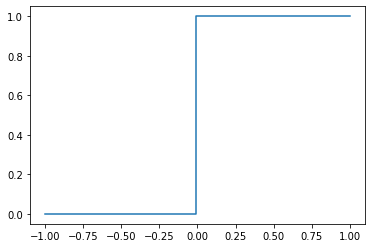

In [ ]:
# 그래프 그리기
x = np.linspace(-1, 1, 100) 
plt.step(x, step_function(x)) 
plt.show() 

#### 시그모이드(Sigmoid)함수 구현하기

In [ ]:
def sigmoid(x):
  return 1/ (1+np.exp(-x))

In [ ]:
x = np.array([-5, -1, 0, 0.1, 5, 500000])
print(sigmoid(x))

[0.00669285 0.26894142 0.5        0.52497919 0.99330715 1.        ]


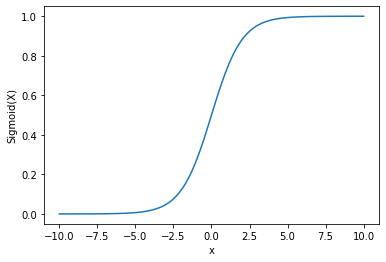

In [ ]:
x = np.linspace(-10, 10, 100) 
  
plt.plot(x, sigmoid(x)) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

#### ReLU 함수

대부분의 이론책에서는 Sigmoid를 가장 많이 다룹니다. 

그러나 실제로 가장 많이 사용하는 것은 ReLU인데요, 이는 Rectified Linear Unit의 줄임말입니다. 

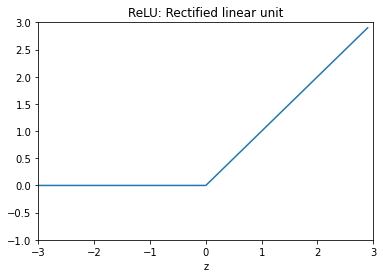

<Figure size 432x288 with 0 Axes>

In [ ]:
# Range
z = np.arange(-3, 3, .1)
zero = np.zeros(len(z))
# max
y = np.max([zero, z], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y)
ax.set_ylim([-1.0, 3.0])
ax.set_xlim([-3.0, 3.0])
#ax.grid(True)
ax.set_xlabel('z')
ax.set_title('ReLU: Rectified linear unit')

plt.show()
fig = plt.gcf()

## python으로 신경망 제작
자! 그렇다면 이제 신경망을 한번 만들어보겠습니다. 

<img src="https://www.researchgate.net/profile/Haohan_Wang/publication/282997080/figure/fig4/AS:305939199610886@1449952997594/A-typical-two-layer-neural-network-Input-layer-does-not-count-as-the-number-of-layers-of.png" width="450" alt="A typical two layer neural network. Input layer does not count as the number of layers of a network"/>

In [ ]:
# 네트워크 구조 생성 함수 정의
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5, 0.7], [0.1, 0.3, 0.3, 0.7], [0.2, 0.1, 0.6, 0.8]]) # 3 x 4
  network['B1'] = np.array([0.11, 0.12, 0.13, 0.14])
  network['W2'] = np.array([[0.1, 0.5], [0.2, 0.6], [0.3, 0.4], [0.35, 0.35]]) # 4 x 2
  network['B2'] = np.array([0.1, 0.5])
  network['W3'] = np.array([[0.1, 0.5], [0.2, 0.6]]) # 2 x 2
  network['B3'] = np.array([0.1, 0.5])

  return network

In [ ]:
# 순전파 함수 정의
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['B1'], network['B2'], network['B3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  
  y = a3
  return y

In [ ]:
# 네트워크 제작
network = init_network()
# 샘플 데이터
x = np.array([1, 0.5, 0.7])
# 순전파 실행
y = forward(network, x)
print(y)

[0.34212299 1.36580545]


단순히 입력값에 가중치를 곱해 출력을 내는 매우 간단한 신경망 입니다. 

이 신경망은 함수라고 생각 할 수 있습니다. (신경망 구조와 식의 색을 비교해 보세요)

<img src='http://jalammar.github.io/images/NNs_formula_no_bias.png' width='500'>

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note_image/matdim.png">

이렇게 신경망은 노드들이 가중치로 연결되어 입력값을 출력값으로 내보내는 함수인데 이 가중치를 찾는 과정을 학습(training, learning)이라고 하며 가중치는 예측에 사용됩니다.

이러한 기초 유닛들의 연결 구조에 따라 수많은 신경망들이 만들어 지는데 [THE NEURAL NETWORK ZOO](https://www.asimovinstitute.org/neural-network-zoo/) 에서 놀랍도록 심플한 방법으로 신경망들의 구조를 다이어그램으로 표현하였습니다.

<img src="https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019.png">

  

- 모든 아키텍쳐들을 다 공부할 수 없을 것입니다. 
- 내가 갈 회사에서 어떤 아키텍쳐를 주로 사용하는 지 확인할 수 있고, 그 능력을 키운다면 회사에서는 여러분을 안 뽑을 이유가 없겠죠?

### 신경망 층(Layer) 구성





신경망은 여러 층(layers)으로 구성이 되는데 다음 그림과 같이 기본적으로 입력층(input layers), 은닉층(hidden layers), 출력층(output layers) 으로 나뉩니다.

<img src="https://www.researchgate.net/profile/Haohan_Wang/publication/282997080/figure/fig4/AS:305939199610886@1449952997594/A-typical-two-layer-neural-network-Input-layer-does-not-count-as-the-number-of-layers-of.png" width="450" alt="A typical two layer neural network. Input layer does not count as the number of layers of a network"/>

#### 입력층(Input Layers)

입력층은 데이터셋으로부터 입력을 받습니다. 입력 변수의 수와 입력 노드의 수는 같습니다. 보통 **입력층은 어떤 계산도 수행하지 않고** 그냥 값들을 전달하기만 하는 특징을 가지고 있습니다. 그래서 **신경망의 층수(깊이, depth)를 셀 때 입력층은 포함하지 않습니다**. 위의 신경망은 2층이라고 할 수 있습니다. 



#### 은닉층(Hidden Layers)

계산이 일어나는 층이 둘 이상인 신경망을 다층(multilayer) 신경망 이라고 부르는데 계산이 없는 입력층과 마지막 출력층 사이에 있는 층들을 은닉층(Hidden Layers) 이라고 부릅니다. 은닉층에 있는 **계산의 결과를 사용자가 볼 수 없기(hidden) 때문에** 이런 이름이 붙었습니다. 딥러닝(deep learning)은 사실 두 개 이상의 (이때 부터 깊다(deep)라고 합니다) 은닉층들을 가진 신경망, 입력층을 제외하고 시작하여 3개 이상의 Layer를 갖는 신경망을 의미합니다. 

그렇다면 **위의 그림은 딥러닝일까요?**

은닉층의 개수를 늘리고 그 연결과 학습 방법을 달리하여 더 복잡한 데이터의 구조를 학습하여 이전 성능 기록들을 갱신하게 되면서 딥러닝이 유명하게 되었습니다. 은닉층에는 변수 수와 상관 없이 다수의 노드가 포함 가능합니다.



#### 출력층(Output Layers)

신경만 가장 오른쪽 마지막 층이 출력층 입니다. **출력층에는 대부분 활성함수(activation function)가 존재**하는데 활성화함수는 풀고자 하는 문제에 따라 다른 종류를 사용합니다.

- **회귀 문제에서 예측할 목표 변수가 실수값인 경우 활성화함수가 필요하지 않으며** 출력노드의 수는 출력변수의 갯수와 같습니다.

- **이진 분류(binary classification) 문제의 경우 시그모이드(sigmoid) 함수**를 사용해서 출력을 확률 값으로 변환하여 부류(label)를 결정하도록 합니다.  

- **다중클래스(multi-class)를 분류하는 경우 출력층 노드가 부류 수 만큼 존재하며 소프트맥스(softmax) 함수**를 활성화 함수로 사용합니다. 

복잡한 딥러닝 방법론들에서는 은닉층에서도 활성함수를 사용하기 시작합니다. 
예제를 통해서 보시면 확인이 가능합니다.

그렇다면, 학습 예제를 살펴볼까요?


---



Google에서 제공하는 FrameWork인 Tensorflow의 MNIST 예제를 살펴보도록 합니다.

<img src="https://abpaudel.com/assets/img/posts/mnist.png">





# Tensorflow 신경망 예제

(이 예제는 [tensorflow](https://https://www.tensorflow.org/tutorials/quickstart/beginner) 에서 확인 가능합니다)

항상 라이브러리부터 불러옵니다!

In [ ]:
import pandas as pd
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

     |████████████████████████████████| 380.5MB 41kB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 4.3MB 49.2MB/s 
     |████████████████████████████████| 501kB 52.8MB/s 


In [ ]:
# 라이브러리 데이터셋을 불러옵니다. 
mnist = tf.keras.datasets.mnist

# Training Set, Test Set을 분류해줍니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Value normalization을 수행합니다. 
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 데이터의 레이블 구성 형태를 살펴봅니다.
# 처음보는 데이터의 경우 데이터 자체를 디스플레이 하여 보면 도움이 됩니다.
pd.unique(y_train)

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

In [ ]:
# 신경망 모델을 구축합니다.
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.2), # 다음강의에서 설명이 될 component :: 존재목적 Overfitting 방지
  tf.keras.layers.Dense(10, activation='softmax')
])
# 구축한 모델을 컴파일하며, 옵티마이저, loss function 등을 설정해줍니다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 학습을 하는 부분입니다. 다음 시간에 배우게될 Bp에 대해서 이해를 하신다면 이 과정이 이해가 될 것입니다. 
model.fit(x_train, y_train, epochs=5) # epoch의 수를 변화시키며 더 많이 학습하거나 적게 학습할 수 있습니다. 

## 만들어진 모델을 이용하여 예측하는 부분입니다. 
model.evaluate(x_test,  y_test, verbose=2) ## 테스트 과정

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2963 - accuracy: 0.9130
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1472 - accuracy: 0.9563
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1085 - accuracy: 0.9659
Epoch 4/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0876 - accuracy: 0.9732
Epoch 5/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0741 - accuracy: 0.9765
10000/1 - 1s - loss: 0.0399 - accuracy: 0.9767


[0.0757305722364923, 0.9767]

[텐서플로우 플레이그라운드](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.70910&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)



**인공신경망은 선형 회귀 알고리즘과 다릅니다**

여기서 선형 회귀 문제를 신경망을 통해 풀어본 이유는 가중치, bias등의 신경망 기초 개념과 구조에 익숙해지기 위함입니다.

그리고 앞으로 배울 순방향 신경망(feedforward NN)을 학습할 때 손실 함수(Loss function)를 통해 예측값과 실제값의 차이를 평가하고 경사 하강법(Gradient Descent)을 통해 최적의 가중치, bias를 찾는 개념을 쉽게 이해하기 위해서 입니다.


**그렇다면 왜 신경망이 강력하다고 할까요?**

지금까지는 매우 간단한 신경망으로 매우 간단한 회귀 문제를 풀어 보았는데

노드와 층이 매우 많은 복잡한 신경망은 선형회귀 모델과 달리 무엇이 강력한 것일까요?

**신경망의 Nonlinearities(비선형성)**

선형 회귀는 n-차원 공간에서 선형 모델을 학습하기 위한 방법입니다. 물론 비선형(non-linear) 특성들도 다항식(polynomial)을 사용한 선형회귀모델을 사용하면 학습 가능합니다. 문제는 데이터의 차원이 매우 높으며 비선형 패턴을 가진 데이터를 학습하려면 그에 따라 매우 복잡한 다차원의 특성 조합이 필요하게 됩니다. 이렇게 차원이 높은 데이터의 예는 아래와 같은 이미지 데이터를 떠올리시면 됩니다.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/401_Gridlock.jpg/1200px-401_Gridlock.jpg" alt="401 Gridlock.jpg">

사진에 수많은 자동차들과 다른 물체들이 있지만 우리는 한 번에 이 물체가 자동차 인지 아닌지 혹은 어떤 자동차 인지 알 수 있습니다. 이와 같은 이미지 데이터를 학습 데이터로 사용해 회귀 모델을 만든다고 해 봅시다. 데이터의 특성은 pixel 값들을 조합해서 만들어야 하는데 어떤 조합이 자동차들을 잘 구분할 수 있을 까요?

지금까지 여러분들은 머신러닝을 수행하면서 여러분들이 지접 데이터에 대해 파악하여 그 특징에 맞는 특성들을 설계하고 찾아내었습니다. 여기서 컴퓨터가 학습과정을 통해 특성과 출력값 과의 관계를 찾아 주었지요.

반면에 **신경망 학습은 데이터에서 필요한 특성들을 신경망이 알아서 조합하여 찾아냅니다!** 즉 우리는 최소한의 데이터에 대한 전처리는 해야 하지만 심화된 특성 공학(Feature Engineering)을 사용해 특성들을 찾아낼 필요는 없다는 것입니다.

깊은 신경망, 즉 **딥러닝과 머신러닝의 차이는 표현학습(representation learning)**에 있습니다. 딥러닝은 데이터 특성(feature)을 우리가 풀고자 하는 문제를 풀기 쉽도록 표현(representation)하도록 학습하는 능력이 있습니다. 신경망의 구조와 깊이를 변화시키며 데이터를 더욱 유용하게 표현할 수 있습니다.



<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note_image/feature.png">

---

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note_image/catsdogs.png">

---

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note_image/catst.png">

<img src="https://www.researchgate.net/profile/Tugce_Karatas8/publication/331165395/figure/fig1/AS:727499755507719@1550460866636/A-graphical-visualization-of-a-Deep-Neural-Network-from-here.ppm" alt="A graphical visualization of a Deep Neural Network from here"/>

## 퍼셉트론(Perceptron) 리뷰


신경망을 잘 알기 위해서는 가장 간단한 신경망인 퍼셉트론을 잘 알아야 합니다. 퍼셉트론은 단순히 하나의 노드(뉴런)으로 이루어진 신경망 입니다. 퍼셉트론은 다수의 입력값을 가질 수 있고 하나의 출력값을 내보냅니다.

하나의 뉴런이 하는 일은 들어온 입력값들을 단순히 가중치를 곱해 모두 더하는 연산(선형결합)을 하고 활성화함수(activation function)에 넣어 그 결과를 출력합니다. 

<img src="https://www.researchgate.net/profile/Zafeirios_Fountas/publication/266485234/figure/fig2/AS:651919710224385@1532441179639/The-simplest-mathematical-model-of-a-neuron-called-the-Perceptron-30.png" alt="2: The simplest mathematical model of a neuron called the Perceptron. [30]"/>

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note_image/perceptron.png">
퍼셉트론을 수식으로 나타내면 다음과 같습니다.

\begin{align}
 y = f(\sum(bias + w_{0}x_{0} + w_{1}x_{1} + ... + w_{n}x_{n}))
\end{align}


앞으로 이 퍼셉트론과 같은 패턴을 모든 네트워크 구조에서 발견할 수 있을것 입니다.

활성화함수로 계단 함수(step function)를 사용해 보면,

${\displaystyle f(\mathbf {x} )={\begin{cases}1&{\text{if }}\ \mathbf {w} \cdot \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}}}$

퍼셉트론은 입력의 선형결합 값이 > 0 인 경우 1이 출력 되고, 그외에는 0이 출력되는 하는 함수로 볼 수 있습니다.


**활성화 함수(Activation Functions)**

신경망에서 각 노드는 활성화 함수를 가지고 있는데, 일반적으로 각 층에는 같은 종류의 활성화 함수를 가지고 있습니다.
실제 뉴런세포에서 신호를 전달(activate or fire)할지 안 할지를 결정하는 기능을 말하는데 인공신경망에서 활성화 함수는 다음 층으로 신호를 얼마만큼 전달할지를 결정합니다. 그래서 때대로 전달함수(transfer function)이라고 부르기도 합니다. 



<img src="https://www.researchgate.net/profile/Vivienne_Sze/publication/315667264/figure/fig3/AS:669951052496900@1536740186369/Various-forms-of-non-linear-activation-functions-Figure-adopted-from-Caffe-Tutorial.png" alt="Various forms of non-linear activation functions (Figure adopted from Caffe Tutorial [46])."/>


# Python으로 만드는 신경망 학습

지금 구현해볼 퍼셉트론은 Rosenblatt이 처음 개발했던 모습과는 다릅니다. 계단함수 대신 비선형 시그모이드함수를 사용하는 다층신경망과 유사하게 만들어 보겠습니다. 


In [ ]:
# 학습데이터를 생성합니다
np.random.seed(405)

# 입력 벡터: [x0, x1]
# X: 입력(inputs)
X = np.array([
    [0, 0]
    ,[0, 1]
    ,[1, 0]
    ,[1, 1]
])

# bias
b = 1

# Y: 타겟값(correct outputs)
Y= np.array([[0],[1],[1],[1]])

활성함수인 시그모이드 함수와 그 도함수 그래프

In [ ]:
# 시그모이드 함수
# net: 입력과 가중치의 가중합
def sigmoid(net):
    return 1 / (1 + np.exp(-net))

# 시그모이드 함수의 도함수 유도 예시
# https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
def sigmoid_prime(net):
    sig = sigmoid(net)
    return sig * (1 - sig)

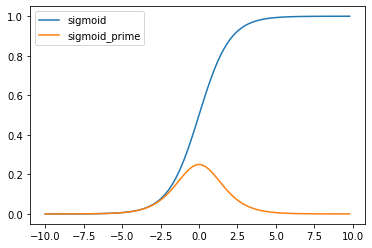

In [ ]:
# 시그모이드 함수 그래프 생성
x_range = np.arange(-10., 10., 0.2)
y_range = np.array([sigmoid(x) for x in x_range])
y_prime = np.array([sigmoid_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='sigmoid') 
plt.plot(x_range, y_prime, label='sigmoid_prime')
plt.legend()
plt.show();

#### 초기 가중치는 무작위(Random)

In [ ]:
# W: [weight0, weight1]
W = 2 * np.random.rand(2,1) - 1
W

array([[ 0.40316676],
       [-0.44345216]])

#### 입력데이터와 가중치 연산

In [ ]:
# Z: 가중합
Z = np.dot(X, W) + b
Z

array([[1.        ],
       [0.55654784],
       [1.40316676],
       [0.9597146 ]])

#### 활성화 함수를 사용해 학습군(epoch)의 출력

In [ ]:
# A: 출력(activated outputs)
A = sigmoid(Z)
A

array([[0.73105858],
       [0.6356534 ],
       [0.80268592],
       [0.72306466]])

#### 출력 오차를 줄이기 위한 역전파(경사하강법 이용) 
에러를 계산하기 위해 실제 타겟 값과 출력값의 차를 계산합니다.

경사하강법은 손실값에 대한 미분값을 사용하여 최저의 손실값을 가지는 매개변수(가중치)를 찾는 방법 입니다. 그리고 역전파 알고리즘은 경사하강법에 필요한 미분값을 빠르고 효율적으로 찾는 알고리즘입니다. 자세한 내용은 다음 강의에서 배울 것이기 때문에 지금은 이 방법을 코드로 이용하는 부분만 살펴 보시기 바랍니다.

에러 계산에는 MSE 비용함수(cost function)을 사용할 때, 가중치에 대해 도함수를 구하면
([sebastianraschka](https://sebastianraschka.com/faq/docs/mse-derivative.html))

\begin{align}
\frac{\partial E}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{2n} \sum_{i=1}^{n} (t_i - o_i)^2 \\
&= \frac{1}{2n} \sum_{i=1}^{n} \frac{\partial}{\partial w_j} (t_i - o_i)^2 \quad [\text{chain rule}] \\
&= \frac{1}{2n} \sum_{i=1}^{n} 2 (t_i - o_i) \frac{\partial}{\partial w_j} (t_i - o_i) \quad [\text{sum rule}] \\
&= \frac{1}{n} \sum_{i=1}^{n}  (t_i - o_i) \left( \frac{\partial}{\partial w_j} t_i - \frac{\partial}{\partial w_j}  o_i \right)\\
&= - \frac{1}{n} \sum_{i=1}^{n}  (t_i - o_i) \frac{\partial}{\partial w_j}  o_i
\end{align}

와 같은 형태가 되고 $o_i$ 를 $w_j$에 관해 편미분 하면

\begin{align}
\frac{\partial}{\partial w_j}  o_i
& =  \frac{\partial o_i}{\partial \text{net}_i}\frac{\partial\text{net}_i}{\partial {w_j}}.
\end{align}

라고 쓸 수 있습니다. 벡터 계산 코드로 구현하면 다음과 같고 이를 가중치 업데이트에 사용합니다.

In [ ]:
# da: 에러값,  dE/da
# dz: dE/dz
# dw: 가중치 업데이트 값 
# db: bias 업데이트 값
da = A - Y
dz = da * sigmoid_prime(Z)
dw = np.dot(X.T, dz)
db = np.sum(da, keepdims=True)

print(dw)
print(db)

[[-0.08670498]
 [-0.13983613]]
[[-0.10753744]]


In [ ]:
X.T

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [ ]:
dz

array([[ 0.14373484],
       [-0.084382  ],
       [-0.03125085],
       [-0.05545413]])

In [ ]:
db

array([[-0.10753744]])

In [ ]:
print('기존 가중치: \n',W)


기존 가중치: 
 [[ 0.40316676]
 [-0.44345216]]


In [ ]:
# 가중치 업데이트(batch)
W += dw
b += db

In [ ]:
print('업데이트 후 가중치: \n', W)
print('업데이트 후 bias: \n', b)

업데이트 후 가중치: 
 [[ 0.31646178]
 [-0.58328829]]
업데이트 후 bias: 
 [[0.89246256]]


### 반복(iteration)을 통한 정교한 가중치 생성

In [ ]:
# 이미 입력 데이터와 타겟 출력은 윗 부분에서 선언 하였습니다.

# 가중치 초기화
# W = 2 * np.random.random((2,1)) - 1
W = np.random.randn(2,1)
# W = np.zeros((2,1))

b = 0

print('학습 전 가중치: \n', W)

# 가중치 업데이트를 10,000회 (10,000 epoch) 진행하겠습니다.

for iteration in range(1000):

    # 순방향 전파
    Z = np.dot(X, W) + b
    A = sigmoid(Z)

    # 역방향 전파(기울기 계산)
    da = Y - A
    dz = da * sigmoid_prime(Z)
    dw = np.dot(X.T, dz)
    db = np.sum(da, keepdims=True)
    
    W += dw
    b += db

print('학습 후 가중치: \n', W)
print('학습 후 bias: \n', b)
print('학습 후 예측값: \n', A.round(3))

학습 전 가중치: 
 [[-1.05882781]
 [ 0.96263862]]
학습 후 가중치: 
 [[5.92183219]
 [5.9221609 ]]
학습 후 bias: 
 [[-2.59091569]]
학습 후 예측값: 
 [[0.07 ]
 [0.965]
 [0.965]
 [1.   ]]



### Iris 데이터를 퍼셉트론으로 분류하는 예제를 살펴 보겠습니다. 
(이 예제는 [blog](https://www.bogotobogo.com/python/scikit-learn/Perceptron_Model_with_Iris_DataSet.php) 에서 확인 가능합니다)

이 예제에서는 퍼셉트론을 클래스로 구현하였는데, 잘 살펴보시기 바랍니다. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# iris 꽃을 구분하기 위한 데이터 입니다.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [ ]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.shape

(150, 5)

In [ ]:
# 50 setosa, 50 versicolor 데이터만 사용합니다.
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
# 타겟 레이블을 setosa = -1, versicolor = 1 로 바꾸겠습니다
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# 두 특성(sepal length, petal length)만 사용합니다
X = df.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

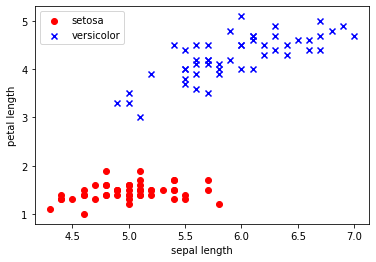

In [ ]:
# 두 특성에 따라 데이터를 그려보겠습니다
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [ ]:
class Perceptron:
    # niter = epoch
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # 초기 가중치 [0, 0, 0]
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = [] 

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                # adjusts
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

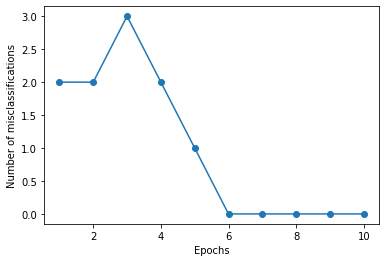

In [ ]:
# 학습률(learning rate): 0.1, epoch: 10
# 퍼셉트론을 학습시키고 오분류(misclassification)의 변화를 살펴보겠습니다.
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [ ]:
# 퍼셉트론의 결정 경계를 확인해 보겠습니다.
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정면을 그립니다
    x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 데이터를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, color=cmap(idx),
        marker=markers[idx], label=cl)

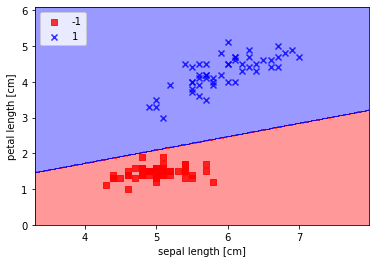

In [ ]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Review

- 퍼셉트론의 이해 : 입력 값 = ? 개, 출력 값 = ? 개
- 다층(Multi-Layer) 퍼셉트론의 개념과 딥러닝의 차이점을 설명할 수 있다.
- 신경망의 기본 구조에 대해서 설명할 수 있다. 
  - 뉴런(노드)
  - 연결(가중치,엣지)
  - 입력/은익/출력층
- 활성함수 : 비선형성을 만들어 주는 구조
- 퍼셉트론의 학습과정을 통해서 학습되는 것은 000이다. 
- 분류/회귀 정의 리뷰, 결정경계

### 참고자료
- (필수)[3 Blue 1 Brown Neural Network Videos](https://youtu.be/aircAruvnKk)
- Alammar, Jay [A Visual and Interactive Guide to the Basics of Neural Networks](https://jalammar.github.io/visual-interactive-guide-basics-neural-networks/).
- [SINGLE LAYER NEURAL NETWORK - PERCEPTRON MODEL ON THE IRIS DATASET USING HEAVISIDE STEP ACTIVATION FUNCTION](https://www.bogotobogo.com/python/scikit-learn/Perceptron_Model_with_Iris_DataSet.php)
- [Andrew Ng, Neural Network](https://www.youtube.com/watch?v=1ZhtwInuOD0&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=43)
- [밑바닥부터 시작하는 딥러닝](https://http://book.interpark.com/product/BookDisplay.do?_method=detail&sc.prdNo=263500510&gclid=Cj0KCQiA7qP9BRCLARIsABDaZzgpPtlR8acSoLvkQGTwQ7VSU85K0YTYFX4vyyZxSKK2t_b2eFqgC0oaAgK9EALw_wcB)
- [딥러닝의 선형 vs 비선형](https://youtu.be/umiqnfQxlac)

## 재현 가능을 위한 Requirements.txt 제작.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
!pip freeze > "drive/MyDrive/Colab Notebooks/section4/N421_requirements.txt"

In [ ]:
!ls drive/MyDrive/Colab\ Notebooks/section4